### Öğrenci Adı : Sultan Şeyma Canbaz
### Öğrenci No : 171213037


In [37]:
#Kullanılan kütüphanler
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import sys
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import  train_test_split
from sklearn import metrics, preprocessing
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.neighbors import KNeighborsClassifier
import pydotplus

In [38]:
df = pd.read_csv("C:\\Customer_Behaviour.csv")

### Veri Analizi

In [39]:
print(df.head())

    User ID  Gender    Age  EstimatedSalary  Purchased
0  15624510    Male    NaN            19000          0
1  15810944    Male  355.0            20000          0
2  15668575  Female   26.0            43000          0
3  15603246  Female    NaN            57000          0
4  15804002    Male   19.0            76000          0


In [40]:
print(df.shape)

(400, 5)


In [41]:
print(df.dtypes)

User ID              int64
Gender              object
Age                float64
EstimatedSalary      int64
Purchased            int64
dtype: object


In [42]:
# İşlemlerimizde kullanılmayacağından dolayı ID kısmı çıkartıldı.
df = df.drop(["User ID"], axis=1)

In [43]:
print(df.describe())

              Age  EstimatedSalary   Purchased
count  385.000000       400.000000  400.000000
mean    38.937662     69742.500000    0.357500
std     20.928108     34096.960282    0.479864
min      1.000000     15000.000000    0.000000
25%     30.000000     43000.000000    0.000000
50%     37.000000     70000.000000    0.000000
75%     46.000000     88000.000000    1.000000
max    355.000000    150000.000000    1.000000


C:\Users\Seyma\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Seyma\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


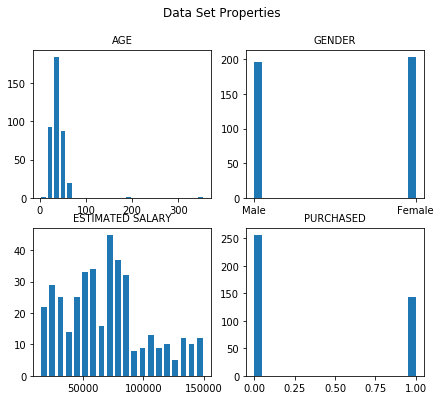

In [44]:
#Veri setindeki niteliklerin histogram ile gösterimi
fig = plt.figure(figsize=(7,6))
fig.suptitle("Data Set Properties")
ax = plt.subplot(2,2,1)
ax.set_title(label="AGE",fontsize = 10)
plt.hist(df.Age,bins = 25,rwidth = 0.7)

ax = plt.subplot(2,2,2)
ax.set_title(label="GENDER",fontsize = 10)
plt.hist(df.Gender,bins = 20)

ax = plt.subplot(2,2,3)
ax.set_title(label="ESTIMATED SALARY",fontsize = 10)
plt.hist(df.EstimatedSalary,bins = 20,rwidth = 0.7)

ax = plt.subplot(2,2,4)
ax.set_title(label="PURCHASED",fontsize = 10)
plt.hist(df.Purchased,bins = 20)

plt.show()

### Veri için ön işleme

###Eksik veri tespiti ve eksik verilerin ortalama ile doldurulması

In [45]:
print(df.isnull().sum())

Gender              0
Age                15
EstimatedSalary     0
Purchased           0
dtype: int64


In [46]:
#Eksik verilerin en çok tekrar eden ilk 5 verinin ortalaması ile doldurulması
print(df['Age'].value_counts())

35.0     30
37.0     20
26.0     16
42.0     16
41.0     16
39.0     15
40.0     15
47.0     13
38.0     13
46.0     12
48.0     12
28.0     12
36.0     12
27.0     12
31.0     10
33.0     10
30.0     10
49.0      9
32.0      9
24.0      9
29.0      8
45.0      7
60.0      7
59.0      6
20.0      6
23.0      6
58.0      6
52.0      6
18.0      5
25.0      5
57.0      5
34.0      5
22.0      5
53.0      5
21.0      4
54.0      4
19.0      4
50.0      4
51.0      3
43.0      3
55.0      3
44.0      2
56.0      2
1.0       1
199.0     1
355.0     1
Name: Age, dtype: int64


In [47]:
df.Age = df.Age.fillna(int((35+37+26+42+41)/3))

Age                   17.0
EstimatedSalary    45000.0
Purchased              1.0
dtype: float64


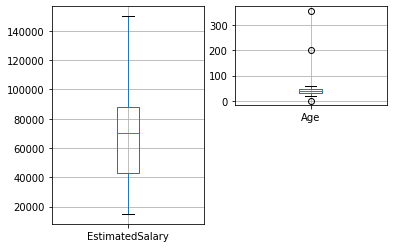

In [48]:
#IQR ile aykırı verilerin tespiti ve boxplot yardımı ile gösterimi

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
ax = plt.subplot(1,2,1)
df.boxplot(column='EstimatedSalary')

ax = plt.subplot(2,2,2)
df.boxplot(column='Age')

plt.show()

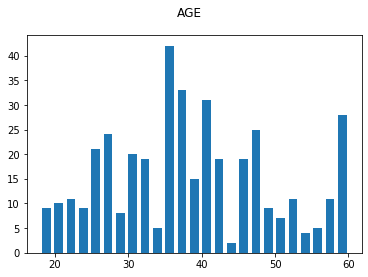

In [49]:
#Aykırı verilerin olduğu niteliklerin silinmesi ve histogram ile gösterimi
index = 0
for x in df.Age:
    if x >= 100 or x<18:
        df = df.drop(index)

    index = index + 1
plt.hist(df.Age,bins = 25,rwidth = 0.7)
plt.suptitle("AGE")
plt.show()



In [50]:
# Gender niteliğinin işlemler için numerik değerelere çevrilmesi
Gender_num = {"Male": 1, "Female": 0} 
df.Gender = df.Gender.replace(Gender_num)

feature_cols = ['Gender','Age','EstimatedSalary']
X = df[feature_cols]
y = df.Purchased

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### KARAR AGACI

Accuracy % 82.5


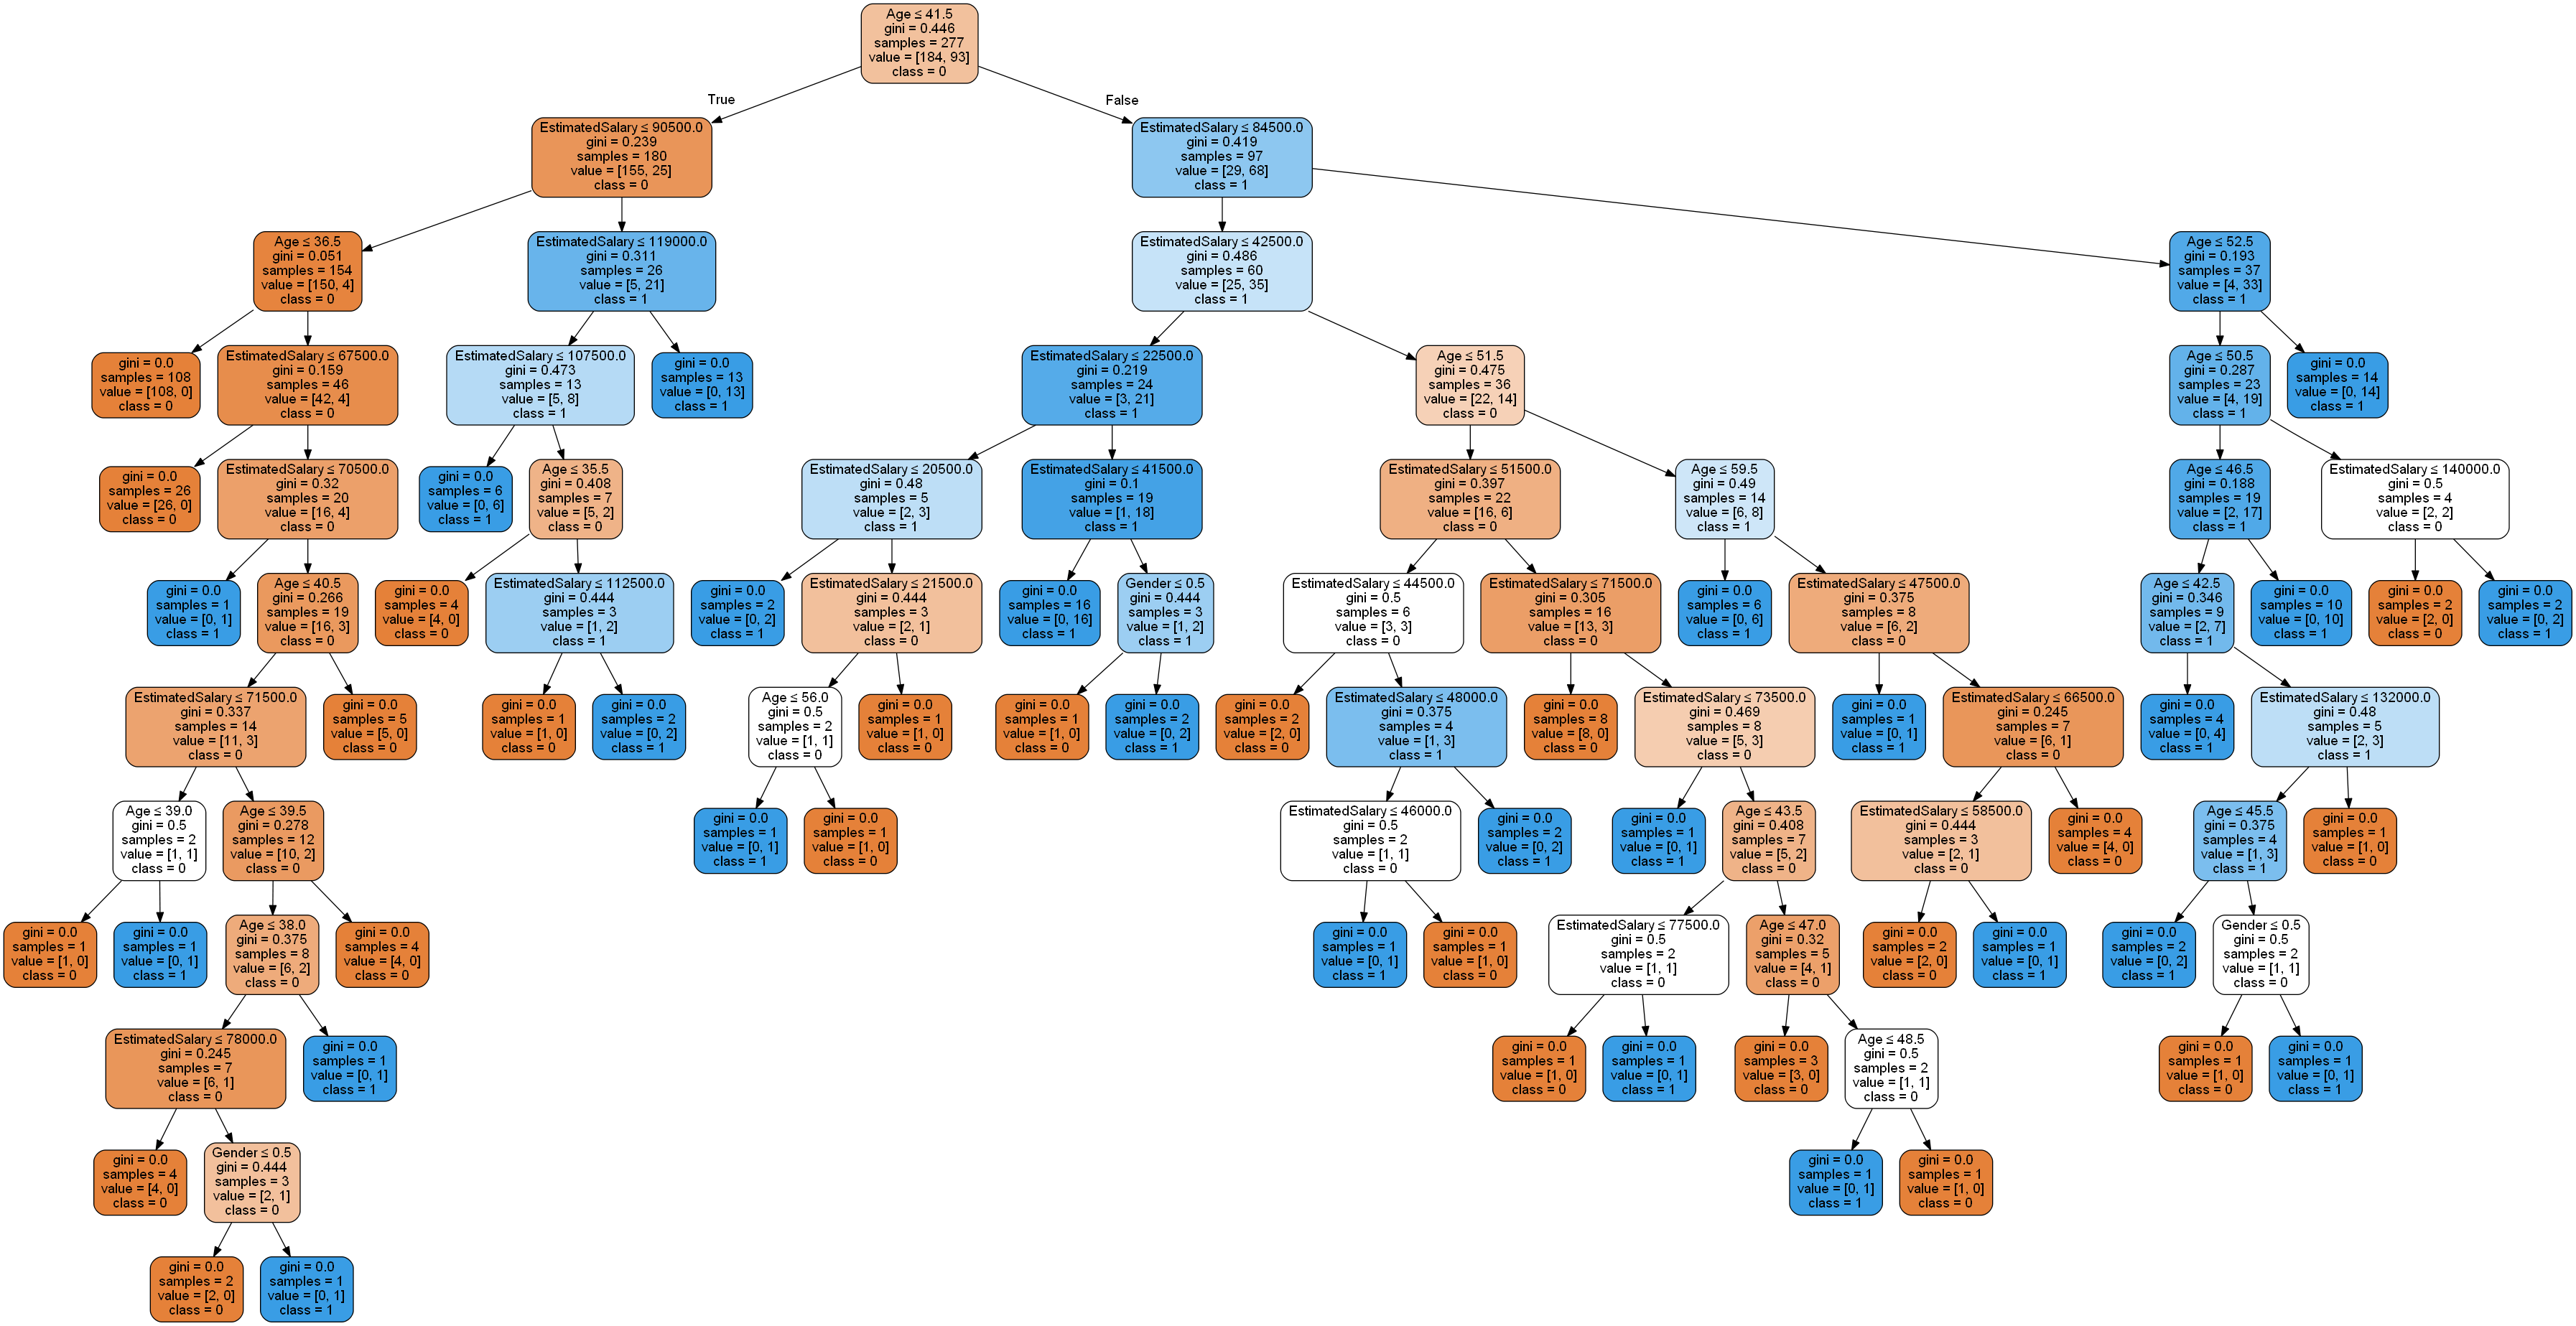

In [51]:
clf = DecisionTreeClassifier()

clf = clf.fit(X=X_train,y = y_train)
y_pred = clf.predict(X_test)
print("Accuracy %",metrics.accuracy_score(y_test, y_pred) * 100)


dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names= feature_cols, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Output.png')
Image(graph.create_png())

### NAIVE-BAYES

In [52]:
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 120 points : 25


### KNN

In [53]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[66  5]
 [ 8 41]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        71
           1       0.89      0.84      0.86        49

    accuracy                           0.89       120
   macro avg       0.89      0.88      0.89       120
weighted avg       0.89      0.89      0.89       120



In [54]:
import pickle
filename = '171213037.pkl'
pickle.dump(knn, open(filename, 'wb'))
pickle.dump(gnb, open(filename, 'wb'))
pickle.dump(clf, open(filename, 'wb'))
